In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\fichiers_csv\insurance.csv")

age	Age in years	integer

gender	Male or Female	integer (1 or 2)

bmi	Body mass index	float

no_of_children	Number of children	integer

smoker	Whether smoker or not	integer (0 or 1)

region	Which US region - NW, NE, SW, SE	integer (1,2,3 or 4 respectively)

charges	Annual Insurance charges in USD	float

In [3]:
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [7]:
df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [8]:
# age
mean_age = df["age"].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# smoker
smoker = df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan, smoker, inplace=True)

# Update
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [9]:
df["charges"] = np.round(df["charges"],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


# Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

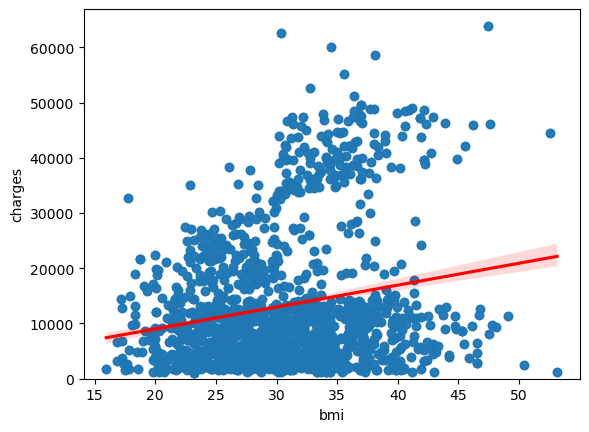

In [10]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.85800000001)

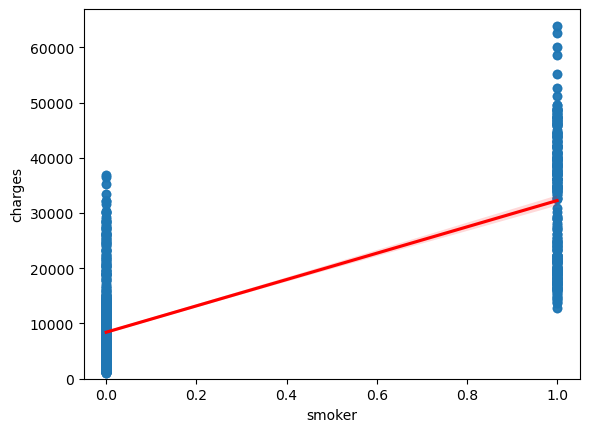

In [11]:
sns.regplot(x='smoker' , y='charges', data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [12]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


# Model

smoker/charges

In [13]:
x = df[["smoker"]]
y = df["charges"]

lm = LinearRegression()
lm.fit(x, y)
print(lm.score(x,y))

0.6227430402464125


all features/charges

In [14]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,y)
print(lm.score(Z,y))

0.7505888664568174


# Training pipeline (StandardScaler(), PolynomialFeatures(), LinearRegression() ) : predict the charges value

In [15]:
Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
print(r2_score(y,ypipe))

0.845368183491743


In [16]:
print(pipe.score(Z,y))

0.845368183491743


# Model Refinement

Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(Z,y, test_size=0.2, random_state=1)

Ridge regressor, alpha=0.1

In [18]:
RM = Ridge(alpha=0.1)
RM.fit(x_train,y_train)
yhat = RM.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412229


polynomial transformation, degree=2

In [19]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RM.fit(x_train_pr,y_train)
y_hat = RM.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.820841319517247
